In [1]:
# Загрузка зависимостей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
def hist_show(d, b = 50):
    plt.hist(d, bins = b)
    plt.show()
    
    
def mm_scaler(d):
    d = np.array(d).reshape(-1, 1)
    d =MinMaxScaler().fit_transform(d).flatten()
    return d


def standard_scaler(d):
    d = np.array(d).reshape(-1, 1)
    d =StandardScaler().fit_transform(d).flatten()
    return d


def replace_zero_to_mean(d):
    mean_data = int(d.mean())
    return d.replace(0, mean_data)

In [3]:
# Загрузка и анализ набора данных
country_dataset = pd.read_csv('Набор_3_страны_мира.csv',  sep=';')
country_dataset.head(10)

,country,region,population,area,coastline,infant_mortality,gdp,literacy,phones,arable,birthrate,deathrate
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,0,"163,07",700.0,36,"3,2","12,13","46,6","20,34"
1,Albania,EASTERN EUROPE,3581655,28748,"1,26","21,52",4500.0,"86,5","71,2","21,09","15,11","5,22"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"0,04",31,6000.0,70,"78,1","3,22","17,14","4,61"
3,American Samoa,OCEANIA,57794,199,"58,29","9,27",8000.0,97,"259,5",10,"22,46","3,27"
4,Andorra,WESTERN EUROPE,71201,468,0,"4,05",19000.0,100,"497,2","2,22","8,71","6,25"
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"0,13","191,19",1900.0,42,"7,8","2,41","45,11","24,2"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"59,8","21,03",8600.0,95,460,0,"14,17","5,34"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"34,54","19,46",11000.0,89,"549,9","18,18","16,93","5,37"
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,"0,18","15,18",11200.0,"97,1","220,4","12,31","16,73","7,55"
9,Armenia,C.W. OF IND. STATES,2976372,29800,0,"23,28",3500.0,"98,6","195,7","17,55","12,07","8,23"


In [4]:
# Создаем набор данных, в котором будут храниться обработанные данные
dataset = pd.DataFrame()

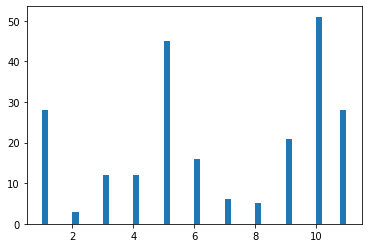

In [5]:
# обработка колонки "region"
data = country_dataset['region']
data = pd.get_dummies(data)
data = np.array([data[i[1]] * (i[0]+1) for i in  enumerate(data)]).flatten()
data = data[data != 0]
hist_show(data)

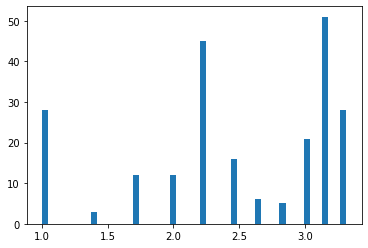

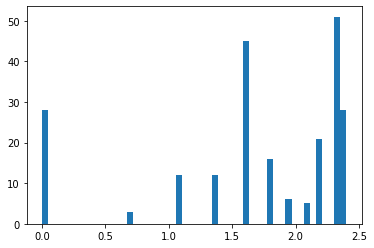

In [6]:
hist_show(data**0.5)
hist_show(np.log(data))

In [7]:
dataset['region'] = mm_scaler(data**0.5) 
dataset.head(10)

,region
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


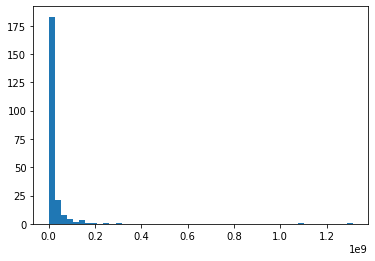

In [8]:
# обработка колонки "population"
data = country_dataset['population']
hist_show(data)

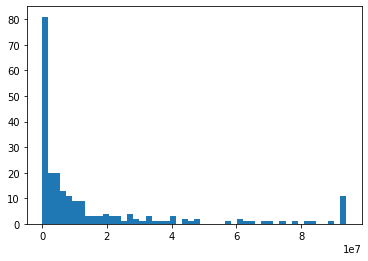

In [9]:
data = np.clip(data, 0, 93973713)
hist_show(data)

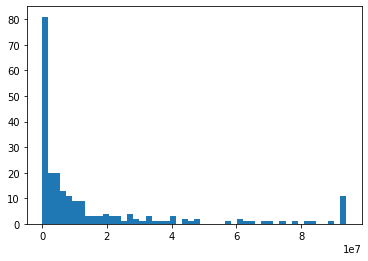

In [10]:
data = replace_zero_to_mean(data)
hist_show(data)

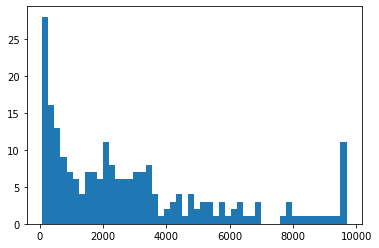

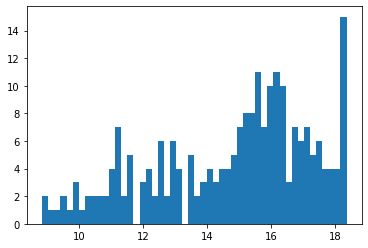

In [11]:
hist_show(data**0.5)
hist_show(np.log(data))

In [12]:
dataset['population'] = mm_scaler(np.log(data)) 
dataset.head(10)

,region,population
0,0.0,0.883468
1,0.0,0.656127
2,0.0,0.889631
3,0.0,0.221791
4,0.0,0.243748
5,0.0,0.784492
6,0.0,0.068557
7,0.0,0.240608
8,0.0,0.909896
9,0.0,0.636643


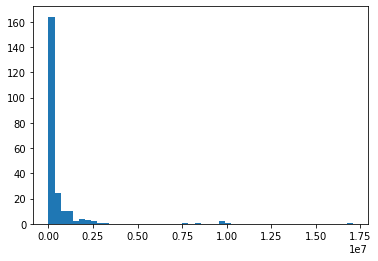

In [13]:
# обработка колонки "area"
data = country_dataset['area']
hist_show(data)

17075200


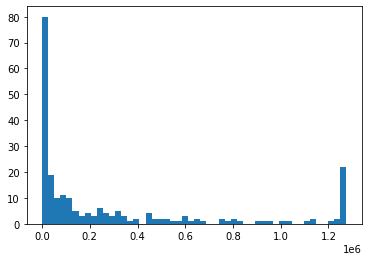

In [14]:
print(max(data))
data = np.clip(data, 0, 1275200)
hist_show(data)

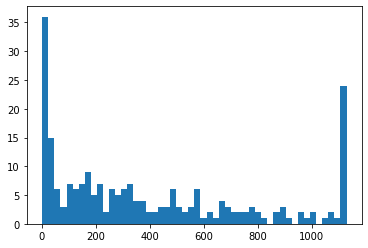

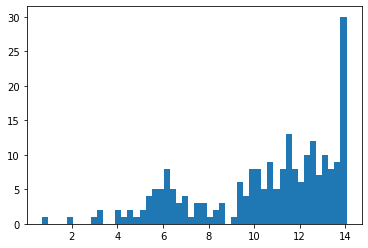

In [15]:
hist_show(data**0.5)
hist_show(np.log(data))

In [16]:
dataset['area'] = mm_scaler(np.log(data)) 
dataset.head(10)

,region,population,area
0,0.0,0.883468,0.949292
1,0.0,0.656127,0.716262
2,0.0,0.889631,1.000000
3,0.0,0.221791,0.344182
4,0.0,0.243748,0.408165
5,0.0,0.784492,0.998309
6,0.0,0.068557,0.294178
7,0.0,0.240608,0.404058
8,0.0,0.909896,1.000000
9,0.0,0.636643,0.718951


/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


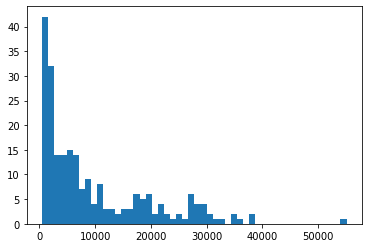

In [17]:
# обработка колонки "gdp"
data = country_dataset['gdp']
hist_show(data)

55100.0


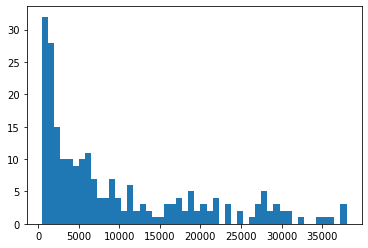

In [18]:
print(max(data))
data = np.clip(data, 0, 38000)
hist_show(data)

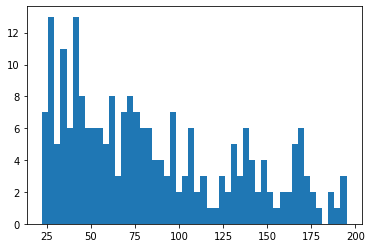

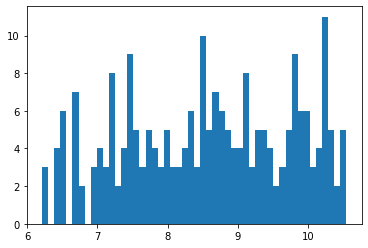

In [19]:
hist_show(data**0.5)
hist_show(np.log(data))

In [20]:
dataset['gdp'] = mm_scaler(data**0.5) 
dataset.head(10)

,region,population,area,gdp
0,0.0,0.883468,0.949292,0.023739
1,0.0,0.656127,0.716262,0.259141
2,0.0,0.889631,1.000000,0.319275
3,0.0,0.221791,0.344182,0.388712
4,0.0,0.243748,0.408165,0.669156
5,0.0,0.784492,0.998309,0.123009
6,0.0,0.068557,0.294178,0.407796
7,0.0,0.240608,0.404058,0.478170
8,0.0,0.909896,1.000000,0.483670
9,0.0,0.636643,0.718951,0.213241


/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


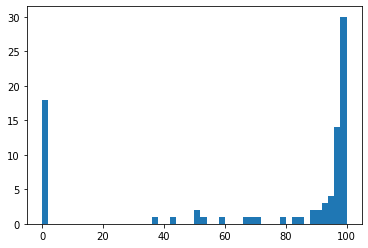

In [21]:
# обработка колонки "literacy"
data = country_dataset['literacy']
data = data.fillna('0')
data = data.apply(pd.to_numeric, errors='coerce')
hist_show(data)

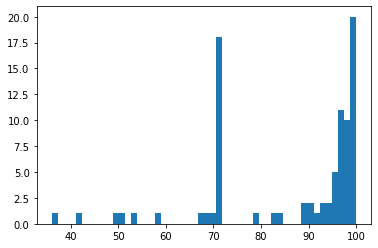

In [22]:
data = replace_zero_to_mean(data)
hist_show(data)

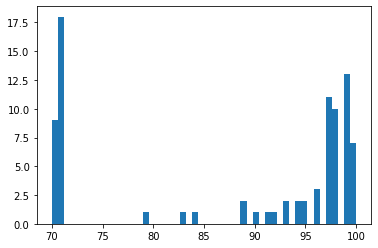

In [23]:
data = np.clip(data, 70, 100)
hist_show(data)

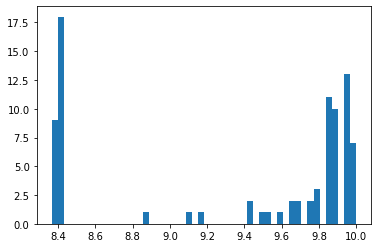

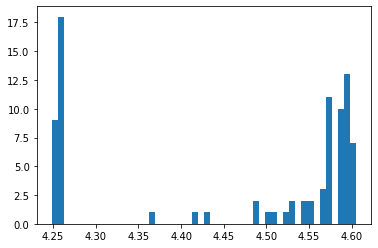

In [24]:
hist_show(data**0.5)
hist_show(np.log(data))

In [25]:
dataset['literacy'] = mm_scaler(data**0.5) 
dataset.head(10)

,region,population,area,gdp,literacy
0,0.0,0.883468,0.949292,0.023739,0.000000
1,0.0,0.656127,0.716262,0.259141,NaN
2,0.0,0.889631,1.000000,0.319275,0.000000
3,0.0,0.221791,0.344182,0.388712,0.907468
4,0.0,0.243748,0.408165,0.669156,1.000000
5,0.0,0.784492,0.998309,0.123009,0.000000
6,0.0,0.068557,0.294178,0.407796,0.844982
7,0.0,0.240608,0.404058,0.478170,0.653472
8,0.0,0.909896,1.000000,0.483670,NaN
9,0.0,0.636643,0.718951,0.213241,NaN


/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


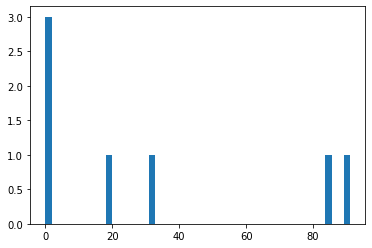

In [26]:
# обработка колонки "infant_mortality"
data = country_dataset['infant_mortality']
data = data.fillna('0')
data = data.apply(pd.to_numeric, errors='coerce')
hist_show(data)

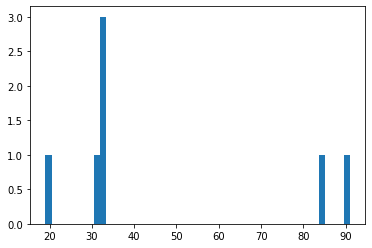

In [27]:
data = replace_zero_to_mean(data)
hist_show(data)

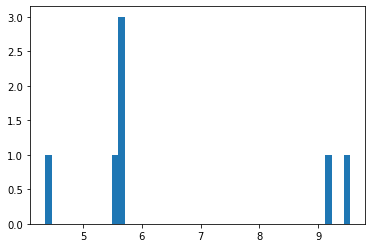

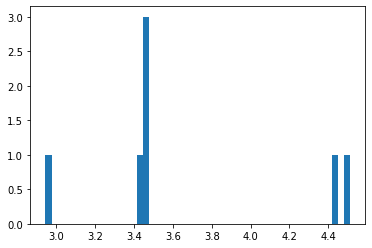

In [28]:
hist_show(data**0.5)
hist_show(np.log(data))

In [29]:
dataset['infant_mortality'] = mm_scaler(np.log(data)) 
dataset.head(10)

,region,population,area,gdp,literacy,infant_mortality
0,0.0,0.883468,0.949292,0.023739,0.000000,NaN
1,0.0,0.656127,0.716262,0.259141,NaN,NaN
2,0.0,0.889631,1.000000,0.319275,0.000000,0.312527
3,0.0,0.221791,0.344182,0.388712,0.907468,NaN
4,0.0,0.243748,0.408165,0.669156,1.000000,NaN
5,0.0,0.784492,0.998309,0.123009,0.000000,NaN
6,0.0,0.068557,0.294178,0.407796,0.844982,NaN
7,0.0,0.240608,0.404058,0.478170,0.653472,NaN
8,0.0,0.909896,1.000000,0.483670,NaN,NaN
9,0.0,0.636643,0.718951,0.213241,NaN,NaN


/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


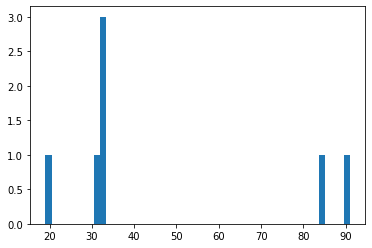

In [30]:
data = replace_zero_to_mean(data)
hist_show(data)

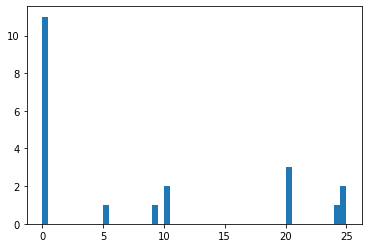

In [31]:
# обработка колонки "arable"
data = country_dataset['arable']
data = data.fillna(0)
data = data.apply(pd.to_numeric, errors='coerce')
hist_show(data)

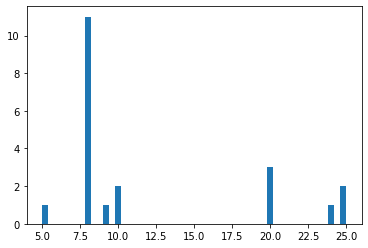

In [32]:
data = replace_zero_to_mean(data)
hist_show(data)

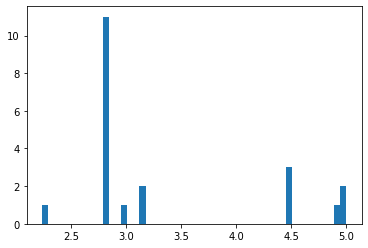

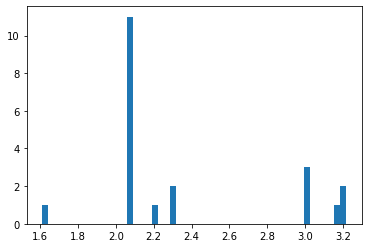

In [33]:
hist_show(data**0.5)
hist_show(np.log(data))

In [34]:
dataset['arable'] = mm_scaler(data**0.5) 
dataset.head(10)

,region,population,area,gdp,literacy,infant_mortality,arable
0,0.0,0.883468,0.949292,0.023739,0.000000,NaN,NaN
1,0.0,0.656127,0.716262,0.259141,NaN,NaN,NaN
2,0.0,0.889631,1.000000,0.319275,0.000000,0.312527,NaN
3,0.0,0.221791,0.344182,0.388712,0.907468,NaN,0.335106
4,0.0,0.243748,0.408165,0.669156,1.000000,NaN,NaN
5,0.0,0.784492,0.998309,0.123009,0.000000,NaN,NaN
6,0.0,0.068557,0.294178,0.407796,0.844982,NaN,0.214318
7,0.0,0.240608,0.404058,0.478170,0.653472,NaN,NaN
8,0.0,0.909896,1.000000,0.483670,NaN,NaN,NaN
9,0.0,0.636643,0.718951,0.213241,NaN,NaN,NaN


/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


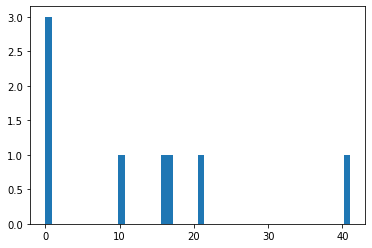

In [35]:
# обработка колонки "birthrate"
data = country_dataset['birthrate']
data = data.fillna(0)
data = data.apply(pd.to_numeric, errors='coerce')
hist_show(data)

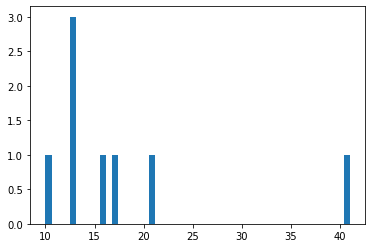

In [36]:
data = replace_zero_to_mean(data)
hist_show(data)

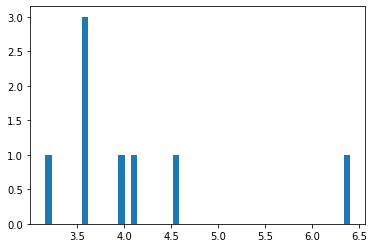

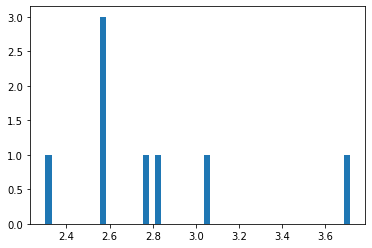

In [37]:
hist_show(data**0.5)
hist_show(np.log(data))

In [38]:
dataset['birthrate'] = mm_scaler(data**0.5) 
dataset.head(10)

,region,population,area,gdp,literacy,infant_mortality,arable,birthrate
0,0.0,0.883468,0.949292,0.023739,0.000000,NaN,NaN,NaN
1,0.0,0.656127,0.716262,0.259141,NaN,NaN,NaN,NaN
2,0.0,0.889631,1.000000,0.319275,0.000000,0.312527,NaN,NaN
3,0.0,0.221791,0.344182,0.388712,0.907468,NaN,0.335106,NaN
4,0.0,0.243748,0.408165,0.669156,1.000000,NaN,NaN,NaN
5,0.0,0.784492,0.998309,0.123009,0.000000,NaN,NaN,NaN
6,0.0,0.068557,0.294178,0.407796,0.844982,NaN,0.214318,NaN
7,0.0,0.240608,0.404058,0.478170,0.653472,NaN,NaN,NaN
8,0.0,0.909896,1.000000,0.483670,NaN,NaN,NaN,NaN
9,0.0,0.636643,0.718951,0.213241,NaN,NaN,NaN,NaN


/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


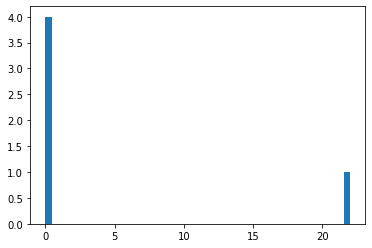

In [39]:
# обработка колонки "deathrate"
data = country_dataset['deathrate']
data = data.fillna(0)
data = data.apply(pd.to_numeric, errors='coerce')
hist_show(data)

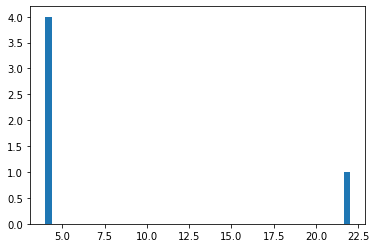

In [40]:
data = replace_zero_to_mean(data)
hist_show(data)

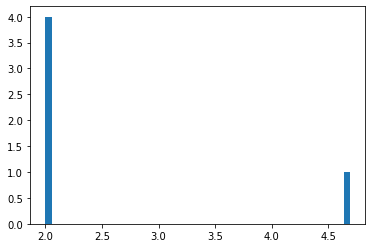

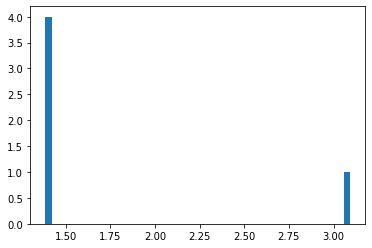

In [41]:
hist_show(data**0.5)
hist_show(np.log(data))

In [42]:
dataset['deathrate'] = mm_scaler(data**0.5) 
dataset.head(10)

,region,population,area,gdp,literacy,infant_mortality,arable,birthrate,deathrate
0,0.0,0.883468,0.949292,0.023739,0.000000,NaN,NaN,NaN,NaN
1,0.0,0.656127,0.716262,0.259141,NaN,NaN,NaN,NaN,NaN
2,0.0,0.889631,1.000000,0.319275,0.000000,0.312527,NaN,NaN,NaN
3,0.0,0.221791,0.344182,0.388712,0.907468,NaN,0.335106,NaN,NaN
4,0.0,0.243748,0.408165,0.669156,1.000000,NaN,NaN,NaN,NaN
5,0.0,0.784492,0.998309,0.123009,0.000000,NaN,NaN,NaN,NaN
6,0.0,0.068557,0.294178,0.407796,0.844982,NaN,0.214318,NaN,NaN
7,0.0,0.240608,0.404058,0.478170,0.653472,NaN,NaN,NaN,NaN
8,0.0,0.909896,1.000000,0.483670,NaN,NaN,NaN,NaN,NaN
9,0.0,0.636643,0.718951,0.213241,NaN,NaN,NaN,NaN,NaN


In [43]:
# Убираем Nan 
for i in dataset:
    dataset[i] = dataset[i].fillna(dataset[i].mean())
dataset.head(10)

,region,population,area,gdp,literacy,infant_mortality,arable,birthrate,deathrate
0,0.0,0.883468,0.949292,0.023739,0.000000,0.466767,0.414029,0.300443,0.2
1,0.0,0.656127,0.716262,0.259141,0.610095,0.466767,0.414029,0.300443,0.2
2,0.0,0.889631,1.000000,0.319275,0.000000,0.312527,0.414029,0.300443,0.2
3,0.0,0.221791,0.344182,0.388712,0.907468,0.466767,0.335106,0.300443,0.2
4,0.0,0.243748,0.408165,0.669156,1.000000,0.466767,0.414029,0.300443,0.2
5,0.0,0.784492,0.998309,0.123009,0.000000,0.466767,0.414029,0.300443,0.2
6,0.0,0.068557,0.294178,0.407796,0.844982,0.466767,0.214318,0.300443,0.2
7,0.0,0.240608,0.404058,0.478170,0.653472,0.466767,0.414029,0.300443,0.2
8,0.0,0.909896,1.000000,0.483670,0.610095,0.466767,0.414029,0.300443,0.2
9,0.0,0.636643,0.718951,0.213241,0.610095,0.466767,0.414029,0.300443,0.2


In [44]:
dataset.to_csv('prepared_data.csv', index=False)